In [23]:
#라이브러리 import 해주기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sb
import io


In [24]:
#구글 드라이브를 사용하여 csv 데이터 불러오기
from google.colab import drive
drive.mount('/content/drive')
filename = '/content/drive/MyDrive/data.csv'
data = pd.read_csv(filename , encoding = 'cp949')
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,작업번호,마킹 길이 (m),절단 길이 (m),철판두께,철판재질,절단갯수,작업장,절단장비,마킹시간(초),절단시간(초)
0,1,46.0,21.9,30.0,DZB,1,23,PL233,194,827
1,2,33.9,111.8,12.0,A,46,23,PL233,324,2906
2,3,49.5,33.5,13.0,A,2,23,PL234,241,1003
3,4,75.7,174.9,13.0,A,35,23,PL233,483,4412
4,5,66.5,66.6,13.0,A,7,23,PL233,331,1601
...,...,...,...,...,...,...,...,...,...,...
162320,162337,139.8,162.0,19.0,AH32,31,23,PL231,827,2899
162321,162338,18.5,28.9,16.0,A,56,25,PL252,165,930
162322,162339,63.7,25.6,15.0,AH32,1,26,PL261,345,696
162323,162340,94.7,61.4,19.0,AH32,2,26,PL261,0,2155


In [25]:
#먼저 각 피쳐에 대한 정보를 알아야한다.
#특이점 : 절단시간과 마킹시간에서 min값이 0인 것을 확인 -> null값은 아니지만 시간이 걸리지 않았다면 이상이 있다 -> 이상치 제거가 필요해 보임
data.describe(percentiles=[])

,작업번호,마킹 길이 (m),절단 길이 (m),철판두께,절단갯수,작업장,마킹시간(초),절단시간(초)
count,162325.000000,162325.000000,162325.000000,162325.000000,162325.000000,162325.000000,1.623250e+05,162325.000000
mean,81170.552250,77.808576,73.842234,17.455914,13.585350,43.923154,8.361304e+02,2188.729801
std,46864.261278,48.093706,53.217750,4.500207,20.712078,32.507921,4.154486e+04,2183.228269
min,1.000000,3.200000,1.100000,6.000000,1.000000,14.000000,0.000000e+00,0.000000
50%,81169.000000,68.300000,52.700000,17.000000,4.000000,25.000000,3.790000e+02,1593.000000
max,162341.000000,524.400000,621.300000,40.000000,416.000000,97.000000,6.157364e+06,348262.000000


In [26]:
#위의 표를 통하여 마킹시간과 절단시간의 최소 최대값에 의문을 가지게 되었는데....해당 셀을 자세히 살펴보도록 하자.
cuttingtime_0 = data['절단시간(초)'] == 0
cuttingtime0 = data[cuttingtime_0]
markingtime_0 = data['마킹시간(초)'] == 0
markingtime0 = data[markingtime_0]
print(cuttingtime0)
print(markingtime0)

#분석결과 마킹시간과 절단시간의 아웃라이어 제거는 필수적인 것으로 보인다.

          작업번호  마킹 길이 (m)  절단 길이 (m)  철판두께  ... 작업장   절단장비  마킹시간(초) 절단시간(초)
38          39      126.8       46.0  20.0  ...  26  PL261      848       0
567        568       18.1       23.9  11.0  ...  26  PL262      511       0
576        577       91.1      175.5  20.5  ...  25  PL253      746       0
2113      2114       34.7       87.3  15.0  ...  26  PL261      507       0
2532      2533       49.2       52.4  22.5  ...  26  PL261      592       0
...        ...        ...        ...   ...  ...  ..    ...      ...     ...
161493  161510       39.6       43.6  22.0  ...  91  PL911     9996       0
161525  161542       19.3       29.3  16.0  ...  26  PL262      590       0
161582  161599      146.4      223.0  14.0  ...  26  PL262      936       0
161590  161607       64.8       26.3  15.0  ...  25  PL253     1203       0
162209  162226      208.6       50.4  20.0  ...  26  PL261      670       0

[252 rows x 10 columns]
          작업번호  마킹 길이 (m)  절단 길이 (m)  철판두께  ... 작업장   절단장비  마킹시

Text(0.5, 1.0, 'time boxplot')

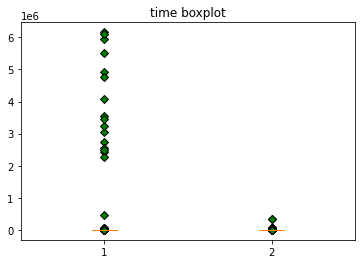

In [27]:
#종속함수의 아웃라이어를 제거하는 코드를 실행한 결과 별다른 해당값을 찾지 못하였다. 아웃라이어가 없는 것인가...? 아웃라이어가 있는지 없는지를 알기 위해 boxplot을 그려보도록 하자.
green_diamond = dict(markerfacecolor = 'g', marker = 'D')
plt.boxplot([data['마킹시간(초)'], data['절단시간(초)']], flierprops = green_diamond)
plt.title("time boxplot")
#boxplot의 형태를 보니 아웃라이어는 존재한다.

In [28]:
def outliers_iqr(data):
  q1, q3 = np.percentile(data,[25,75])
  iqr = q3 - q1
  lower_bound = q1 - (iqr * 1.5)
  upper_bound = q3 + (iqr * 1.5)

  return np.where((data > upper_bound)|(data < lower_bound))

markingtime_outlier_index = outliers_iqr(data['마킹시간(초)'])[0]
cuttingtime_outlier_index = outliers_iqr(data['절단시간(초)'])[0]

print(data.loc[markingtime_outlier_index, '마킹시간(초)'])
print(data.loc[cuttingtime_outlier_index, '절단시간(초)'])

33        2409
35        1523
36        1053
47        1162
63        1708
          ... 
162193    1766
162206    1034
162251    1234
162284    1213
162303    1114
Name: 마킹시간(초), Length: 6292, dtype: int64
7          5667
9          9549
10         6502
11         6463
63         5381
          ...  
162288     8644
162290    10816
162296     8261
162305     6491
162314     7130
Name: 절단시간(초), Length: 8542, dtype: int64


In [29]:
data_outlier_index = np.concatenate((markingtime_outlier_index,cuttingtime_outlier_index), axis=None)
print(len(data_outlier_index))

14834


In [30]:
data_not_outlier_index = []
for i in data.index:

  if i not in data_outlier_index :
    data_not_outlier_index.append(i)

In [31]:
data_clean = data.loc[data_not_outlier_index]
data_clean = data_clean.reset_index(drop=True)
data_clean

,작업번호,마킹 길이 (m),절단 길이 (m),철판두께,철판재질,절단갯수,작업장,절단장비,마킹시간(초),절단시간(초)
0,1,46.0,21.9,30.0,DZB,1,23,PL233,194,827
1,2,33.9,111.8,12.0,A,46,23,PL233,324,2906
2,3,49.5,33.5,13.0,A,2,23,PL234,241,1003
3,4,75.7,174.9,13.0,A,35,23,PL233,483,4412
4,5,66.5,66.6,13.0,A,7,23,PL233,331,1601
...,...,...,...,...,...,...,...,...,...,...
149264,162337,139.8,162.0,19.0,AH32,31,23,PL231,827,2899
149265,162338,18.5,28.9,16.0,A,56,25,PL252,165,930
149266,162339,63.7,25.6,15.0,AH32,1,26,PL261,345,696
149267,162340,94.7,61.4,19.0,AH32,2,26,PL261,0,2155


In [32]:
#하지만 마킹시간과 절단시간이 0인 데이터는 사라지지 않은 것으로 보인다. outlier로 판정되지 않았다는 것이다.
cuttingtime_0 = data_clean['절단시간(초)'] == 0
cuttingtime0 = data_clean[cuttingtime_0]
markingtime_0 = data_clean['마킹시간(초)'] == 0
markingtime0 = data_clean[markingtime_0]
print(cuttingtime0)
print(markingtime0)

#시간이 0으로 표기된 상황은 이상치로 판단하여 제거한다. 더군다나 두 칼럼을 합치더라도 약 5000개의 행이기 때문에 전체 16만개에 대해 적은 비중을 차지 -> 과감히 제거해보도록 하자.

          작업번호  마킹 길이 (m)  절단 길이 (m)  철판두께  ... 작업장   절단장비  마킹시간(초) 절단시간(초)
31          39      126.8       46.0  20.0  ...  26  PL261      848       0
492        568       18.1       23.9  11.0  ...  26  PL262      511       0
500        577       91.1      175.5  20.5  ...  25  PL253      746       0
1930      2114       34.7       87.3  15.0  ...  26  PL261      507       0
2301      2533       49.2       52.4  22.5  ...  26  PL261      592       0
...        ...        ...        ...   ...  ...  ..    ...      ...     ...
147645  160538       49.1      114.5  20.0  ...  25  PL253      660       0
148516  161498       18.1       23.1  14.0  ...  26  PL262      628       0
148556  161542       19.3       29.3  16.0  ...  26  PL262      590       0
148605  161599      146.4      223.0  14.0  ...  26  PL262      936       0
149164  162226      208.6       50.4  20.0  ...  26  PL261      670       0

[211 rows x 10 columns]
          작업번호  마킹 길이 (m)  절단 길이 (m)  철판두께  ... 작업장   절단장비  마킹시

In [33]:
data_0 = data_clean[(data_clean['절단시간(초)'] == 0) | (data_clean['마킹시간(초)'] == 0)].index
data_completed = data_clean.drop(data_0)
data_completed

,작업번호,마킹 길이 (m),절단 길이 (m),철판두께,철판재질,절단갯수,작업장,절단장비,마킹시간(초),절단시간(초)
0,1,46.0,21.9,30.0,DZB,1,23,PL233,194,827
1,2,33.9,111.8,12.0,A,46,23,PL233,324,2906
2,3,49.5,33.5,13.0,A,2,23,PL234,241,1003
3,4,75.7,174.9,13.0,A,35,23,PL233,483,4412
4,5,66.5,66.6,13.0,A,7,23,PL233,331,1601
...,...,...,...,...,...,...,...,...,...,...
149263,162336,75.2,124.0,16.0,AH32,33,23,PL234,464,3077
149264,162337,139.8,162.0,19.0,AH32,31,23,PL231,827,2899
149265,162338,18.5,28.9,16.0,A,56,25,PL252,165,930
149266,162339,63.7,25.6,15.0,AH32,1,26,PL261,345,696


In [34]:
#랜덤포레스트를 통한 마킹시간과 절단시간 예측.
#우선 독립변수와 종속변수 사이의 상관관계를 분석해보도록 한다
corr_data_completed = data_completed.corr(method = 'pearson')
corr_data_completed
#상관관계를 살펴보니 마킹시간 -> 마킹길이, 절단길이와 가장 큰 상관관계를 보인다./ 절단시간 -> 절단 길이, 절단갯수와 가장 큰 상관관계를 보인다.
#다만 지금은 철판재질과 절단장비를 고려하지 않은 것이다.


,작업번호,마킹 길이 (m),절단 길이 (m),철판두께,절단갯수,작업장,마킹시간(초),절단시간(초)
작업번호,1.000000,0.034811,0.006201,-0.025811,-0.004991,0.011280,0.050322,0.002298
마킹 길이 (m),0.034811,1.000000,0.064779,0.040899,-0.217742,0.057203,0.708683,0.043909
절단 길이 (m),0.006201,0.064779,1.000000,-0.283597,0.532988,-0.002161,0.336746,0.893000
철판두께,-0.025811,0.040899,-0.283597,1.000000,-0.310356,0.016451,-0.094868,-0.024261
절단갯수,-0.004991,-0.217742,0.532988,-0.310356,1.000000,-0.049957,-0.006328,0.485044
작업장,0.011280,0.057203,-0.002161,0.016451,-0.049957,1.000000,-0.006088,-0.014188
마킹시간(초),0.050322,0.708683,0.336746,-0.094868,-0.006328,-0.006088,1.000000,0.336412
절단시간(초),0.002298,0.043909,0.893000,-0.024261,0.485044,-0.014188,0.336412,1.000000


In [35]:
#특정 작업장에는 특정 절단 장비가 있다. -> 작업장의 번호가 절단 장비의 이름에 내재되어 있음.
#데이터를 정규화 할 필요는 없어보인다.
#그렇다면 마킹시간(초)를 예측하는 매트릭스와 절단시간(초)를 예측하는 매트릭스 두 개를 모두 만들어보도록 한다.
df_cutting_time = data_completed[['절단 길이 (m)','절단갯수','철판재질','작업장','절단장비','절단시간(초)']]
df_marking_time = data_completed[['마킹 길이 (m)','절단 길이 (m)','철판재질','작업장','절단장비','마킹시간(초)' ]]
print(df_cutting_time)
print(df_marking_time)

        절단 길이 (m)  절단갯수      철판재질  작업장   절단장비  절단시간(초)
0            21.9     1   DZB       23  PL233      827
1           111.8    46  A          23  PL233     2906
2            33.5     2  A          23  PL234     1003
3           174.9    35  A          23  PL233     4412
4            66.6     7  A          23  PL233     1601
...           ...   ...       ...  ...    ...      ...
149263      124.0    33  AH32       23  PL234     3077
149264      162.0    31  AH32       23  PL231     2899
149265       28.9    56  A          25  PL252      930
149266       25.6     1  AH32       26  PL261      696
149268       20.7     8  DH32       26  PL262      678

[144407 rows x 6 columns]
        마킹 길이 (m)  절단 길이 (m)      철판재질  작업장   절단장비  마킹시간(초)
0            46.0       21.9   DZB       23  PL233      194
1            33.9      111.8  A          23  PL233      324
2            49.5       33.5  A          23  PL234      241
3            75.7      174.9  A          23  PL233      483
4            

In [36]:
#랜덤포레스트를 돌리기 위해선 범주형 변수를 더미화 해주어야 한다.
data_cutting_dummy_mat = pd.get_dummies(df_cutting_time, columns = ['철판재질','작업장','절단장비'])
data_cutting_dummy_mat

,절단 길이 (m),절단갯수,절단시간(초),철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,철판재질_EH32-TM,...,작업장_21,작업장_22,작업장_23,작업장_24,작업장_25,작업장_26,작업장_27,작업장_91,작업장_92,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963
0,21.9,1,827,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,111.8,46,2906,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,33.5,2,1003,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,174.9,35,4412,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,66.6,7,1601,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149263,124.0,33,3077,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149264,162.0,31,2899,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149265,28.9,56,930,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149266,25.6,1,696,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
#랜덤포레스트 데이터셋 분리하기
from sklearn.model_selection import train_test_split

X1=data_cutting_dummy_mat.drop(['절단시간(초)'], axis=1)
Y1=data_cutting_dummy_mat['절단시간(초)']


X1_train,X1_test,Y1_train,Y1_test = train_test_split(X1,Y1,test_size=0.4,shuffle=True,random_state=1004)
print(len(X1_train))
print(len(Y1_train))
print(len(X1_test))
print(len(Y1_test))

86644
86644
57763
57763


In [38]:
#절단시간 예측

from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

forest = RandomForestRegressor()
forest.fit(X1_train, Y1_train)
Y1_pred = forest.predict(X1_test)

print(forest.score(X1_train, Y1_train))


0.969958451676599


In [39]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(Y1_test, Y1_pred))

def RMSE(y,pred):
  return np.sqrt(np.mean(np.square(Y1_pred)))

print(RMSE(Y1_test, Y1_pred), rmse)


2139.861887310434 429.3478503090079


In [40]:
#랜덤포레스트를 돌리기 위해선 범주형 변수를 더미화 해주어야 한다.
data_marking_dummy_mat = pd.get_dummies(df_marking_time, columns = ['철판재질','작업장','절단장비'])
data_marking_dummy_mat

,마킹 길이 (m),절단 길이 (m),마킹시간(초),철판재질_32M60C,철판재질_9NI,철판재질_A,철판재질_AA,철판재질_AAH32,철판재질_AAH32-TM,철판재질_AAH36,철판재질_AE,철판재질_AEH32-TM,철판재질_AH32,철판재질_AH32-TM,철판재질_AH32TL,철판재질_AH36,철판재질_AH36-TM,철판재질_AH36TL,철판재질_AH40-TM,철판재질_B,철판재질_BA,철판재질_BAH32,철판재질_BAH36,철판재질_BZ,철판재질_BZB,철판재질_D,철판재질_DH32,철판재질_DH32-TM,철판재질_DH32TL,철판재질_DH36,철판재질_DH36-TM,철판재질_DH36TL,철판재질_DH40-TM,철판재질_DZB,철판재질_DZB,철판재질_DZB-TM,철판재질_E,철판재질_E-TM,철판재질_EH32,철판재질_EH32-TM,...,작업장_21,작업장_22,작업장_23,작업장_24,작업장_25,작업장_26,작업장_27,작업장_91,작업장_92,작업장_96,작업장_97,절단장비_PL141,절단장비_PL142,절단장비_PL211,절단장비_PL212,절단장비_PL221,절단장비_PL223,절단장비_PL224,절단장비_PL231,절단장비_PL233,절단장비_PL234,절단장비_PL241,절단장비_PL242,절단장비_PL252,절단장비_PL253,절단장비_PL254,절단장비_PL261,절단장비_PL262,절단장비_PL271,절단장비_PL272,절단장비_PL273,절단장비_PL911,절단장비_PL921,절단장비_PL922,절단장비_PL961,절단장비_PL973,절단장비_PL974,절단장비_PS213,절단장비_PS243,절단장비_PS963
0,46.0,21.9,194,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,33.9,111.8,324,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,49.5,33.5,241,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,75.7,174.9,483,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,66.5,66.6,331,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149263,75.2,124.0,464,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149264,139.8,162.0,827,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149265,18.5,28.9,165,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
149266,63.7,25.6,345,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
X2=data_marking_dummy_mat.drop(['마킹시간(초)'], axis=1)
Y2=data_marking_dummy_mat['마킹시간(초)']


X2_train,X2_test,Y2_train,Y2_test = train_test_split(X2,Y2,test_size=0.4,shuffle=True,random_state=1004)
print(len(X2_train))
print(len(Y2_train))
print(len(X2_test))
print(len(Y2_test))
print(X2)

86644
86644
57763
57763
        마킹 길이 (m)  절단 길이 (m)  철판재질_32M60C    ...  절단장비_PS213  절단장비_PS243  절단장비_PS963
0            46.0       21.9              0  ...           0           0           0
1            33.9      111.8              0  ...           0           0           0
2            49.5       33.5              0  ...           0           0           0
3            75.7      174.9              0  ...           0           0           0
4            66.5       66.6              0  ...           0           0           0
...           ...        ...            ...  ...         ...         ...         ...
149263       75.2      124.0              0  ...           0           0           0
149264      139.8      162.0              0  ...           0           0           0
149265       18.5       28.9              0  ...           0           0           0
149266       63.7       25.6              0  ...           0           0           0
149268       11.4       20.7             

In [42]:
forest2 = RandomForestRegressor()
forest2.fit(X2_train, Y2_train)

print(forest2.score(X2_train, Y2_train))

0.9562858477428549


In [43]:
from sklearn.model_selection import GridSearchCV

def get_best_params(model, params):
  grid_model = GridSearchCV(model, param_grid = params, scoring = 'neg_mean_squared_error', cv=5)
  grid_model.fit(X1_train, Y1_train)
  rmse = np.sqrt(-1*grid_model.best_score_)
  print('최적 평균 RMSE 값:', np.round(rmse,4))
  print('최적 파라미터 :', grid_model.best_params_)

  return grid_model.best_estimator_

In [44]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
import xgboost as xgb

model=xgb.XGBRegressor()

param_grid={'booster' :['gbtree','dart'],
                 'learning_rate' : [0.01,0.05,0.1],
       'nrounds' : [1000, 2000],
       'gamma' : [0,10],   
       'max_depth' : [8,-1]}

      
gcv=GridSearchCV(model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

gcv.fit(X1_train, Y1_train)
print('final params', gcv.best_params_)  
print('best score', gcv.best_score_)




[13:15:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:16:24] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:17:13] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:18:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:18:49] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:19:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:20:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[13:21:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

KeyboardInterrupt: ignored

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
XGB_reg=XGBRegressor(booster ='gbtree', learning_rate = 0.1, nrounds = 1000, gamma = 0, max_depth = 8)
XGB_reg.fit(X1_train,Y1_train)
XGB_pred = XGB_reg.predict(X1_test)

print("Mean Absolute Error : " + str(mean_absolute_error(XGB_pred, Y1_test)))

[13:22:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


KeyboardInterrupt: ignored

In [46]:
from lightgbm import LGBMRegressor

LGBM_model = LGBMRegressor(n_estimators = 3000)
evals = [(X1_test, Y1_test)]
LGBM_model.fit(X1_train, Y1_train, early_stopping_rounds = 100, eval_metric = 'logloss', eval_set = evals, verbose = True)


[1]	valid_0's l2: 1.04221e+06
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 886893
[3]	valid_0's l2: 760455
[4]	valid_0's l2: 657793
[5]	valid_0's l2: 574446
[6]	valid_0's l2: 506771
[7]	valid_0's l2: 451424
[8]	valid_0's l2: 406318
[9]	valid_0's l2: 369537
[10]	valid_0's l2: 339293
[11]	valid_0's l2: 314730
[12]	valid_0's l2: 294687
[13]	valid_0's l2: 278204
[14]	valid_0's l2: 264562
[15]	valid_0's l2: 253209
[16]	valid_0's l2: 243978
[17]	valid_0's l2: 236456
[18]	valid_0's l2: 230059
[19]	valid_0's l2: 224606
[20]	valid_0's l2: 219904
[21]	valid_0's l2: 215928
[22]	valid_0's l2: 212442
[23]	valid_0's l2: 209509
[24]	valid_0's l2: 207098
[25]	valid_0's l2: 204969
[26]	valid_0's l2: 203151
[27]	valid_0's l2: 201506
[28]	valid_0's l2: 200062
[29]	valid_0's l2: 198753
[30]	valid_0's l2: 197670
[31]	valid_0's l2: 196703
[32]	valid_0's l2: 195765
[33]	valid_0's l2: 194920
[34]	valid_0's l2: 194108
[35]	valid_0's l2: 193272
[36]	valid_0's l2: 192649
[37]	

LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=3000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [47]:
#위의 베스트 파라미터를 사용해보도록 한다.
LGBM_reg = LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=3000, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
LGBM_reg.fit(X1_train,Y1_train)
LGBM_pred = LGBM_reg.predict(X1_test)

print("Mean Absolute Error : " + str(mean_absolute_error(LGBM_pred, Y1_test)))

Mean Absolute Error : 271.96321905890056


In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from lightgbm import LGBMRegressor

LGBM_reg = LGBMRegressor(colsample_bytree= 0.9, learning_rate= 0.05, max_depth= 10, num_iterations= 2000, subsample= 0.8)
LGBM_reg.fit(X1_train,Y1_train)
LGBM_pred = LGBM_reg.predict(X1_test)
print(f"lgb를 통한 절단시간 mae : {np.sqrt(mean_absolute_error(Y1_test, LGBM_pred))}")

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:118: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


lgb를 통한 절단시간 mae : 16.485715082300537


In [ ]:
from lightgbm.sklearn import LGBMRegressor
import lightgbm as lgb

params = {'booster' :['gbtree','dart'],
    'num_iterations': [1000, 1500, 2000], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth
    ': [3,4,5,6,7, 8,9,10], 
    'colsample_bytree': [0.8, 0.9], 
    'subsample': [0.8, 0.9]
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LGBMRegressor(), params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X2_train, Y2_train)

print(abs(grid_search.best_score_))
print(grid_search.best_params_)

In [ ]:
LGBM_reg1=XGBRegressor(booster ='gbtree', learning_rate = 0.05, num_iterations = 1500, colsamplt_bytree = 0.8, subsample = 0.8 , max_depth = 9)
LGBM_reg1.fit(X2_train,Y2_train)
LGBM_pred1 = LGBM_reg1.predict(X2_test)

print("Mean Absolute Error : " + str(mean_absolute_error(LGBM_pred1, Y2_test)))

In [ ]:
from sklearn.metrics import explained_variance_score
print(explained_variance_score(LGBM_pred1, Y2_test))
LGBM_reg1.score(X2_test, Y2_test)
##하이퍼 파라미터를 사용하였지만 그렇게 높지는 않은 예측률
##현부형님 말씀대로 예측한 절단시간을 독립변수로 두어 마킹시간의 예측 정확도를 더 높여보자


In [ ]:
LGBM_pred = LGBM_reg.predict(X1)
LGBM_pred

In [ ]:
data_plus = pd.DataFrame({'절단시간' : LGBM_pred}, columns = ['절단시간'])
data_plus

In [ ]:
data_marking_dummy_mat["절단시간"] = LGBM_pred
data_marking_dummy_mat

In [ ]:
X3=data_marking_dummy_mat.drop(['마킹시간(초)'], axis=1)
Y3=data_marking_dummy_mat['마킹시간(초)']


X3_train,X3_test,Y3_train,Y3_test = train_test_split(X3,Y3,test_size=0.4,shuffle=True,random_state=1004)
print(len(X3_train))
print(len(Y3_train))
print(len(X3_test))
print(len(Y3_test))
print(X3)

In [ ]:
from lightgbm.sklearn import LGBMRegressor
import lightgbm as lgb

params = {'booster' :['gbtree','dart'],
    'num_iterations': [1500, 2000, 2500], 
    'learning_rate': [0.1, 0.05, 0.01], 
    'max_depth': [6,7, 8,9,10], 
    'colsample_bytree': [0.8, 0.9], 
    'subsample': [0.8, 0.9]
}

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(LGBMRegressor(), params, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')

grid_search.fit(X3_train, Y3_train)

print(abs(grid_search.best_score_))
print(grid_search.best_params_)